# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import models
from tensorflow.keras import layers

In [2]:
concrete_data = pd.read_csv('compresive_strength_concrete.csv')

In [3]:
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<b> Streamlining column names 

In [4]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(concrete_data.columns)
curr_col_names
mapper = {}
for i,name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]
  
    
concrete_data = concrete_data.rename(columns = mapper)


In [5]:
concrete_data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
concrete_data.isna().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

In [7]:
concrete_data.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


##### Checking the pairwise relations of Features.

In [8]:
concrete_data.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CC_Strength'],
      dtype='object')

# Data Preprocessing

In [9]:
mean_label = concrete_data.iloc[:,-1].mean()
std_label = concrete_data.iloc[:,-1].std()
print(mean_label)
print(std_label)

35.81796116504851
16.705741961912505


In [10]:
min_d = concrete_data.min()
max_d = concrete_data.max()
diff = max_d - min_d
normalized_df=(concrete_data - min_d)/ diff
normalized_df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860


In [11]:
test_d = normalized_df.sample(frac=0.3, random_state=1337)

In [12]:
train_d = normalized_df.drop(test_d.index)

In [13]:
print(
    "Using %d samples for training and %d for validation"
    % (len(train_d), len(test_d))
)

Using 721 samples for training and 309 for validation


In [14]:
train_x = train_d.iloc[:,:-1]
train_y = train_d.iloc[:,-1]

In [15]:
test_x = test_d.iloc[:,:-1]
test_y = test_d.iloc[:,-1]

In [16]:
print(train_x.shape)
print(train_y.shape)

print(test_x.shape)
print(test_y.shape)

(721, 8)
(721,)
(309, 8)
(309,)


In [17]:
train_x.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,0.398916,0.209151,0.275074,0.474875,0.191035,0.504600,0.454488,0.116867
std,0.236975,0.241233,0.320671,0.167766,0.181320,0.228512,0.196272,0.162553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.201598,0.000000,0.000000,0.349840,0.000000,0.380814,0.351982,0.016484
50%,0.349315,0.066778,0.000000,0.504792,0.195652,0.485465,0.466884,0.074176
75%,0.563927,0.403450,0.591204,0.560703,0.313665,0.694767,0.577020,0.151099
max,1.000000,1.000000,1.000000,0.999201,1.000000,1.000000,1.000000,1.000000


In [18]:
# train_data = np.array(train_x.iloc[:])
# test_data = np.array(test_x.iloc[:])

In [19]:
train_data = train_x.to_numpy()
test_data = test_x.to_numpy()

In [20]:
test_labels= np.array(test_y.astype('float32'))
train_labels= np.array(train_y.astype('float32'))

In [21]:
# train_labels= np.array(train_y.astype('float32'))

In [22]:
train_labels.shape

(721,)

In [23]:
# we are passing activation function as a parameter here so that we can call this function with tanh or relu while
# fitting and training the model

def build_model(act):
    model = models.Sequential()
    model.add(layers.Dense(10, activation= act,input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(8, activation= act))
    model.add(layers.Dense(6, activation= act))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [24]:
build_model('relu').summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_relu = build_model('relu')
history = model_relu.fit(train_data, train_labels,epochs= 100, batch_size=1, validation_split=0.3)

Epoch 1/100
504/504 [==============================] - 2s 3ms/step - loss: 0.0967 - mae: 0.2489 - val_loss: 0.0371 - val_mae: 0.1535
Epoch 2/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0422 - mae: 0.1693 - val_loss: 0.0284 - val_mae: 0.1348
Epoch 3/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0328 - mae: 0.1461 - val_loss: 0.0341 - val_mae: 0.1519
Epoch 4/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0205 - mae: 0.1151 - val_loss: 0.0295 - val_mae: 0.1406
Epoch 5/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0171 - mae: 0.1015 - val_loss: 0.0226 - val_mae: 0.1218
Epoch 6/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0164 - mae: 0.0943 - val_loss: 0.0258 - val_mae: 0.1308
Epoch 7/100
504/504 [==============================] - 1s 2ms/step - loss: 0.0167 - mae: 0.0940 - val_loss: 0.0178 - val_mae: 0.1064
Epoch 8/100
504/504 [==============================] - 1s 1ms/step - 

504/504 [==============================] - 1s 1ms/step - loss: 0.0049 - mae: 0.0529 - val_loss: 0.0197 - val_mae: 0.1130
Epoch 63/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0053 - mae: 0.0555 - val_loss: 0.0138 - val_mae: 0.0916
Epoch 64/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0054 - mae: 0.0559 - val_loss: 0.0178 - val_mae: 0.1040
Epoch 65/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0064 - mae: 0.0593 - val_loss: 0.0178 - val_mae: 0.1031
Epoch 66/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0049 - mae: 0.0527 - val_loss: 0.0187 - val_mae: 0.1070
Epoch 67/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0057 - mae: 0.0559 - val_loss: 0.0140 - val_mae: 0.0924
Epoch 68/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0056 - mae: 0.0550 - val_loss: 0.0172 - val_mae: 0.1022
Epoch 69/100
504/504 [==============================] - 1s 1ms/step - loss:

In [26]:
test_mse_score, test_mae_score = model_relu.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.0092 - mae: 0.0688


In [27]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [28]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

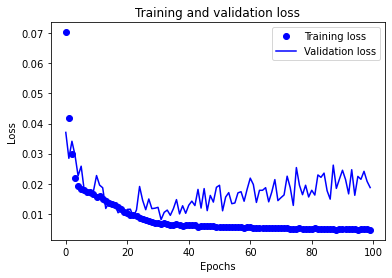

In [29]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(len(history_dict['loss']))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

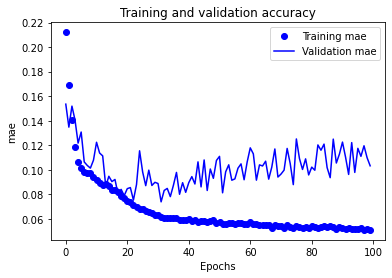

In [30]:
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [31]:
y_predict = model_relu.predict(test_data)
y_predict.shape

(309, 1)

In [32]:
def denorm(x):
    return (x * std_label) + mean_label

In [33]:

y_predict = denorm(y_predict)
y_predict = y_predict.flatten()
y_predict.shape

(309,)

In [34]:
y_true = denorm(test_labels)
y_true = y_true.flatten()
test_labels.shape

(309,)

(35.0, 55.0)

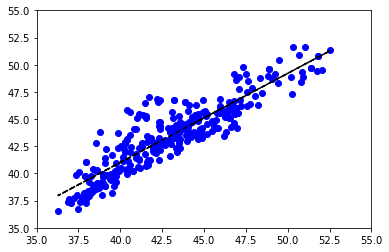

In [35]:
coef = np.polyfit(y_true,y_predict,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(y_true, y_predict, 'bo', y_true, poly1d_fn(y_true), '--k')
plt.xlim(35, 55)
plt.ylim(35, 55)